In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("adult.data.csv")

In [83]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## How many people of each race are represented in this dataset?

In [84]:
race = df["race"].value_counts()

In [85]:
race

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [86]:
race_count = [i for i in race]
race_percent = [round(i/sum(df["race"].value_counts()) * 100, 2) for i in race_count]
race_label = list(df["race"].unique())
labels = [i for i in race_label]
sizes = [i for i in race_percent]
race_percent

[85.43, 9.59, 3.19, 0.96, 0.83]

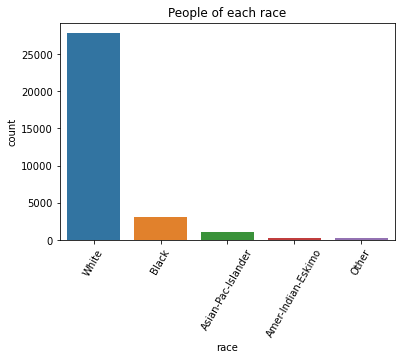

In [90]:
ax = sns.countplot(x="race", data=df)

ax.set(xlabel="race", ylabel="count", title="People of each race")

labels = [i for i in df.race.unique()]

plt.xticks(rotation=60)
plt.show()

## What is the average age of men?

In [91]:
men = df[df["sex"] == "Male"].describe()

In [92]:
avg_age_men = round(men["age"].iloc[1], 1)
avg_age_men

39.4

## What is the percentage of people who have a Bachelor's degree?

In [93]:
bachelors = df[df["education"] == "Bachelors"]

In [94]:
bachelors_percent = round(bachelors["education"].value_counts().iloc[0]/sum(df["education"].value_counts()) * 100, 1)

In [95]:
bachelors_percent

16.4

##  What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [96]:
degree = ["Bachelors", "Masters", "Doctorate"]

high_degree = df.loc[df["education"].isin(degree)]
total = sum(high_degree["education"].value_counts())

high_degree = high_degree[high_degree["salary"] == ">50K"]


In [97]:
high_degree_percent = round(sum(high_degree["education"].value_counts())/total * 100, 1)
high_degree_percent

46.5

## What percentage of people without advanced education make more than 50K?

In [98]:
lower_degree = df.loc[~df["education"].isin(degree)]
total = sum(lower_degree["education"].value_counts())

lower_degree = lower_degree[lower_degree["salary"] == ">50K"]

In [99]:
lower_degree_percent = round(sum(lower_degree["education"].value_counts())/total * 100, 1)
lower_degree_percent

17.4

## What is the minimum number of hours a person works per week?

In [100]:
min_hrs = df["hours-per-week"].min()
min_hrs

1

In [101]:
min_hrs_workers = df.loc[df["hours-per-week"] == min_hrs]
high_min_workers = min_hrs_workers[min_hrs_workers["salary"] == ">50K"]

high_min_percent = round(sum(high_min_workers["hours-per-week"].value_counts())/sum(min_hrs_workers["hours-per-week"].value_counts()) * 100)
high_min_percent

10

## What country has the highest percentage of people that earn >50K and what is that percentage?

In [102]:
highest_earning_country = ""
highest_earning_country_percentage = 0

In [103]:
for (country), sub_df in df.groupby(["native-country"]):
    percent = len(sub_df[sub_df["salary"] == ">50K"])/len(sub_df)
    if highest_earning_country_percentage < percent:
        highest_earning_country_percentage = round(percent, 3)
        highest_earning_country = country
highest_earning_country_percentage *= 100

In [104]:
highest_earning_country, highest_earning_country_percentage

('Iran', 41.9)

## Identify the most popular occupation for those who earn >50K in India.

In [105]:
india = df.loc[(df["native-country"] == "India") & (df["salary"] == ">50K")]
pop_occ = india["occupation"].value_counts().index[0]
pop_occ

'Prof-specialty'